In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import resample

Data Exploration and Preprocessing

In [2]:
# Load the dataset
file_path = "seattle-weather.csv"  
df = pd.read_csv(file_path)

In [3]:
# 1. Check basic information
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None


In this dataset, there are 1461 observations.

Column Descriptions:

- date: the specific date of the observation, in a YYYY-MM-DD format
- preciptation: the total rainfall or snowfall received during the day (millimeters)
- temp_max: maximum temperature recorded that day (Degrees Celsius)
- temp_min: minimum temperature recorded on that day 
- wind: average daily wind speed (meters per second)
- weather: represents weather conditions of that day (e.g. rain, sun, drizzle, fog, snow)

In [4]:
# 2. Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


Thankfully, there is no data missing, so no adjustments need there. 

In [5]:
# 3. Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

In [6]:
# 4. Encode the categorical 'weather' column
label_encoder = LabelEncoder()
df['weather_encoded'] = label_encoder.fit_transform(df['weather'])

In [7]:
# 5. Scale numerical features
scaler = MinMaxScaler()
df[['precipitation', 'temp_max', 'temp_min', 'wind']] = scaler.fit_transform(df[['precipitation', 'temp_max', 'temp_min', 'wind']])

In [8]:
# 6. Display summary statistics after preprocessing
print("\nSummary Statistics After Scaling:\n", df.describe())


Summary Statistics After Scaling:
                       date  precipitation     temp_max     temp_min  \
count                 1461    1461.000000  1461.000000  1461.000000   
mean   2013-12-31 00:00:00       0.054194     0.484922     0.603731   
min    2012-01-01 00:00:00       0.000000     0.000000     0.000000   
25%    2012-12-31 00:00:00       0.000000     0.327957     0.452756   
50%    2013-12-31 00:00:00       0.000000     0.462366     0.606299   
75%    2014-12-31 00:00:00       0.050089     0.639785     0.759843   
max    2015-12-31 00:00:00       1.000000     1.000000     1.000000   
std                    NaN       0.119503     0.197574     0.197756   

              wind  weather_encoded  
count  1461.000000      1461.000000  
mean      0.312213         2.752225  
min       0.000000         0.000000  
25%       0.197802         2.000000  
50%       0.285714         2.000000  
75%       0.395604         4.000000  
max       1.000000         4.000000  
std       0.158003  

<Figure size 1200x600 with 0 Axes>

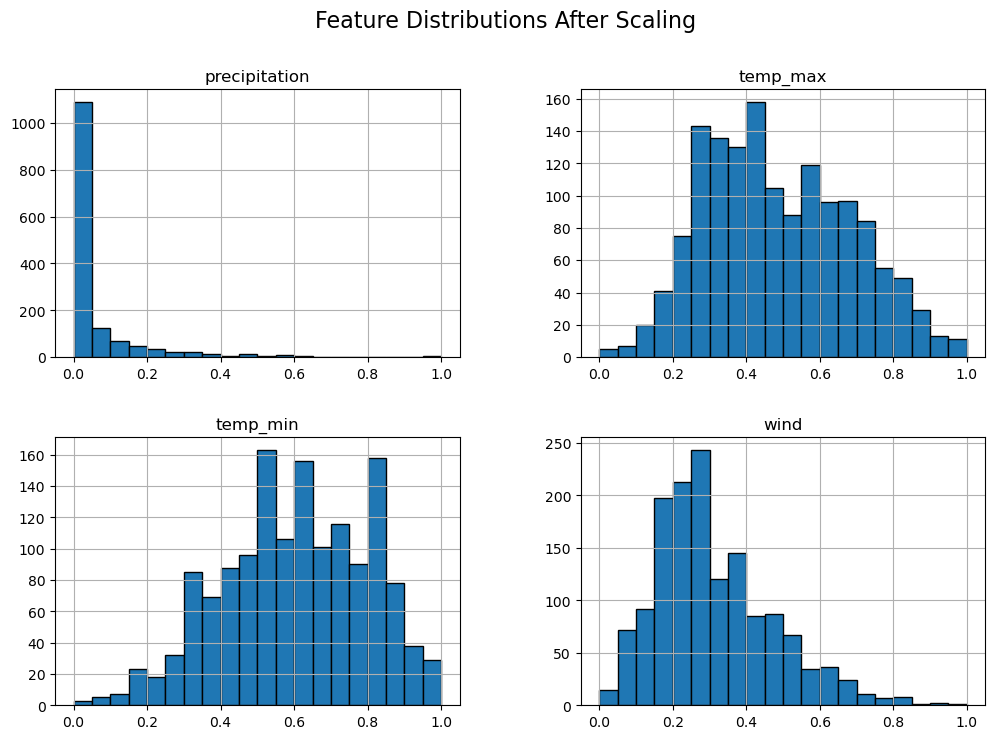

In [9]:
# 7. Plot feature distributions
plt.figure(figsize=(12, 6))
df[['precipitation', 'temp_max', 'temp_min', 'wind']].hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions After Scaling", fontsize=16)
plt.show()

In [10]:
# 8. Display the first few rows of the cleaned dataset
print("\nProcessed Dataset Sample:\n", df.head())


Processed Dataset Sample:
         date  precipitation  temp_max  temp_min      wind  weather  \
0 2012-01-01       0.000000  0.387097  0.476378  0.472527  drizzle   
1 2012-01-02       0.194991  0.327957  0.389764  0.450549     rain   
2 2012-01-03       0.014311  0.357527  0.562992  0.208791     rain   
3 2012-01-04       0.363148  0.370968  0.500000  0.472527     rain   
4 2012-01-05       0.023256  0.282258  0.389764  0.626374     rain   

   weather_encoded  
0                0  
1                2  
2                2  
3                2  
4                2  


Training the Model

In [11]:
# Preprocess data
df.columns = df.columns.str.strip().str.lower()

In [12]:
# Define features and target variable
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
X = df[features]
y = df['weather']

In [13]:
# Handle class imbalance by manually oversampling rare classes
df_rare = df[df['weather'].isin(['drizzle', 'fog', 'snow'])]
df_common = df[~df['weather'].isin(['drizzle', 'fog', 'snow'])]
df_rare_oversampled = resample(df_rare, replace=True, n_samples=len(df_common) // 2, random_state=42)
df_balanced = pd.concat([df_common, df_rare_oversampled])

In [14]:
# Define balanced features and target
X_balanced = df_balanced[features]
y_balanced = df_balanced['weather']

In [15]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

In [16]:
# Train Random Forest Classifier with class weighting
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [17]:
# Make predictions on test set
y_pred = rf_model.predict(X_test)

In [18]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [19]:
# Print model results
print(f"Model Accuracy: {accuracy:.4f}")
print("\\nClassification Report:\\n", class_report)

Model Accuracy: 0.8987
\nClassification Report:\n               precision    recall  f1-score   support

     drizzle       0.82      0.91      0.86        34
         fog       0.88      0.96      0.92        76
        rain       0.98      0.88      0.93       129
        snow       0.89      0.89      0.89        18
         sun       0.86      0.88      0.87       128

    accuracy                           0.90       385
   macro avg       0.89      0.90      0.89       385
weighted avg       0.90      0.90      0.90       385



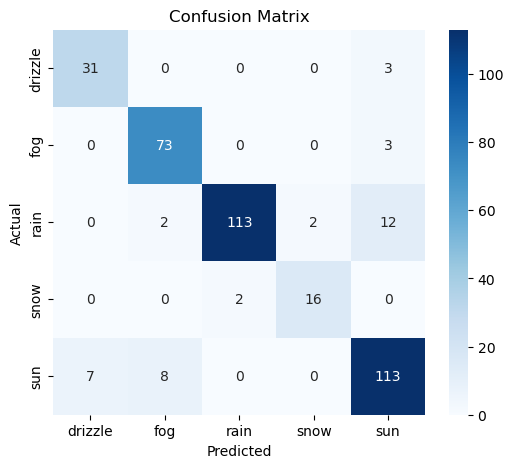

In [20]:
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Conclusion / Results